In [ ]:
import pandas as pd
!pip install fastai==1.0.52
from fastai.text import *
import os
from google.colab import drive
from sklearn import model_selection
from sklearn.metrics import f1_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=7f723463d882e4146c91c2a1c1329de6c27a4f9919c3abbb6047b5a2e6d1cb7a
  Stored in directory: /root/.cache/pip/wheels/b9/b1/68/cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26323 sha256=d742516976397cf16a6db139075af40d3be945af92663e7c21a990aa81685588
  Stored in directory: /root/.cache/pip/wheels/5e/5d/01/3083e091b57809dad979ea543def62d9d878950e3e74f0c930
Successfully built nvidia-ml-py3 typing
  Att

In [ ]:
drive.mount('/content/drive', force_remount=True)
path = Path(os.getcwd())
gdrive = path = path/'drive'/'My Drive'/'ML Data'
imdb1m = pd.read_csv(gdrive/'imdb1m-posts.txt', sep = "\t", names = ["postId",	"userId",	"title",	"content"])
imdb1m.head()

authors = imdb1m.userId.unique()[:10]
imdb1m = imdb1m.loc[imdb1m['userId'].isin(authors)]
imdb1m['userId'].mask(imdb1m['userId'] == 17539655, 0, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 6517255, 1, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 539755, 2, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 337755, 3, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 11234955, 4, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 13333255, 5, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 374655, 6, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 8683655, 7, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 329755, 8, inplace=True)
imdb1m['userId'].mask(imdb1m['userId'] == 2184555, 9, inplace=True)

Mounted at /content/drive


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
def separate(str1):
#   return str
  ret = ""
  new_str = str(str1)
  for c in new_str:
    ret = ret+" "+c
  return ret
imdb1m['content'] = imdb1m['content'].apply(separate)
imdb1m.head()

,postId,userId,title,content
0,142052843,0,Re : Did anyone else almost cry ?,I n e v e r c r y a t f i l m s . ...
1,142016310,0,Re : Dont see this film if you want a comedy,W h y d o p e o p l e t h i n k f i l...
2,137632559,0,Re : No appeal to 15-25 year olds .,I ' m 1 8 a n d I l o v e d i t ....
3,138807061,0,Re : Very Poor Ending,"Y e p , I h a v e t o a g r e e T..."
4,140395804,0,Re : Did anyone cry at the end ?,"I w a t c h e d i t a g a i n , j u..."


In [ ]:
bs = 32
bptt = 70
vocab = " !\"#$%&'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”‪™−√∝∞"

class NewTokenizer(BaseTokenizer):
    def tokenizer(self,t):
      return [BOS]+[i for i in t]

UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP
itos = [UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP] + [i for i in vocab]

vocab = Vocab(itos)
tokenizer=Tokenizer(NewTokenizer, pre_rules=[], post_rules=[])

In [ ]:
imdb_train, imdb_test = model_selection.train_test_split(imdb1m, train_size = 0.8)
imdb_train.to_csv(gdrive/'train.csv',index=False)
imdb_test.to_csv(gdrive/'test.csv',index=False)

data_lm = TextLMDataBunch.from_csv(gdrive , 'train.csv', bs=bs , bptt=bptt,tokenizer=tokenizer, vocab=vocab)

data_clas = TextClasDataBunch.from_csv(gdrive, 'train.csv', vocab=vocab, bs=bs, tokenizer=tokenizer)


/usr/local/lib/python3.8/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
64657068, 46209114, 71135612, 72840391, 90083648...
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.8/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

In [ ]:
''.join(data_lm.train_dl.vocab.itos)
data_lm.train_dl.vocab.itos[:10]
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,5.219163,5.133543,0.250000,00:01


/usr/local/lib/python3.8/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/usr/local/lib/python3.8/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

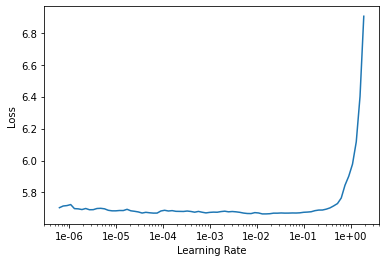

In [ ]:
bs = 32
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn.save_encoder('encoder')

learn_cls.load_encoder('encoder')
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))


In [ ]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["content"].tolist()
  print(len(text_array))
  i = 0
  final_preds = []
  
  for text in text_array:
      preds = learn_cls.predict(text)
      # final_preds.append(str(preds[0]))
      final_preds.append(int(preds[0]))
      i += 1
      print(preds)

  targets = df["userId"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  targets = [int(x) for x in targets]

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1

  print("Accuracy: ")
  print(count/tst)
  # print(err)
  
  return final_preds,targets

preds, targ = testing(gdrive/'test.csv')

out  = f1_score(targ, preds, average='macro') #'macro' , also == weighted cuz dataset is balanced
out

76
(Category 25123461, tensor(74), tensor([0.0041, 0.0032, 0.0045, 0.0042, 0.0046, 0.0044, 0.0043, 0.0038, 0.0041,
        0.0032, 0.0042, 0.0025, 0.0040, 0.0035, 0.0031, 0.0042, 0.0034, 0.0057,
        0.0031, 0.0035, 0.0035, 0.0038, 0.0033, 0.0037, 0.0033, 0.0052, 0.0044,
        0.0052, 0.0046, 0.0041, 0.0030, 0.0046, 0.0054, 0.0033, 0.0027, 0.0036,
        0.0034, 0.0045, 0.0051, 0.0055, 0.0038, 0.0034, 0.0042, 0.0056, 0.0038,
        0.0041, 0.0048, 0.0033, 0.0031, 0.0046, 0.0033, 0.0040, 0.0039, 0.0048,
        0.0035, 0.0046, 0.0047, 0.0055, 0.0050, 0.0039, 0.0043, 0.0049, 0.0031,
        0.0050, 0.0032, 0.0038, 0.0052, 0.0042, 0.0041, 0.0052, 0.0037, 0.0041,
        0.0033, 0.0034, 0.0069, 0.0061, 0.0043, 0.0040, 0.0047, 0.0043, 0.0038,
        0.0038, 0.0049, 0.0029, 0.0056, 0.0040, 0.0042, 0.0044, 0.0040, 0.0036,
        0.0032, 0.0034, 0.0041, 0.0042, 0.0055, 0.0036, 0.0045, 0.0049, 0.0052,
        0.0044, 0.0034, 0.0034, 0.0029, 0.0032, 0.0037, 0.0039, 0.0030, 0.0034,
     

0.0